In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# im_BGR = cv2.imread('./photo3.jpg',cv2.COLOR_GRAY2RGB)
# im = cv2.cvtColor(im_BGR,cv2.COLOR_BGR2RGB)
# 替换为自己的图片地址
im = cv2.imread('./photo3.jpg',cv2.IMREAD_GRAYSCALE)

In [1]:
plt.figure(figsize = (10,10))
ax = plt.subplot()
ax.imshow(im, cmap = "gray")
print(np.shape(im))
plt.show()

NameError: name 'plt' is not defined

In [4]:
# 生成随机椒盐噪点

def MakeNoise(input_image,number_of_noise=1000):
    res_image = np.copy(input_image)
    row,column = np.shape(input_image)
#     还可以加对三通道的特判
    for i in range(number_of_noise):
        x = np.random.randint(0,row)
        y = np.random.randint(0,column)
        borw = np.random.randint(0,2)
        if borw == 0:
            res_image[x][y] = 0
        else:
            res_image[x][y] = 255
    return res_image

def Smooth(input_image,kernal_size = 3):
    ans = input_image.copy()
    border = np.uint8(kernal_size/2)
    # 根据核大小扩充边界
    addBorder = cv2.copyMakeBorder(input_image,border,border,border,border,cv2.BORDER_REFLECT_101)
    filWin = np.ones((kernal_size,kernal_size),dtype=np.int64)
    row,column = np.shape(addBorder)
    for i in range(border,row-border):
        for j in range(border,column-border):
            # 以图像i,j为中心，大小为2border+1的区域
            temp = addBorder[i-border:i+border+1,j-border:j+border+1]
            temp_sum = np.sum(temp*filWin)
            ans[i-border][j-border] = temp_sum/(kernal_size**2)
    return ans
    

im_with_noise = MakeNoise(im)
smmoth_im = Smooth(im_with_noise)

In [2]:
smoth_img = Smooth(im_with_noise,3)
smoth_img2 = Smooth(im_with_noise,15)
plt.figure(figsize=(10,20))
ax = plt.subplot(311)
ax.imshow(im_with_noise, cmap = "gray")
ax.set_title("With Noise")
ax1 = plt.subplot(312)
ax1.imshow(smoth_img,cmap="gray")
ax1.set_title("Smooth With 3x3")
ax2 = plt.subplot(313)
ax2.imshow(smoth_img2,cmap = "gray")
ax2.set_title("Smooth With 15x15")
plt.show()

NameError: name 'Smooth' is not defined

The Laplace template is: 
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
The Laplace template is: 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


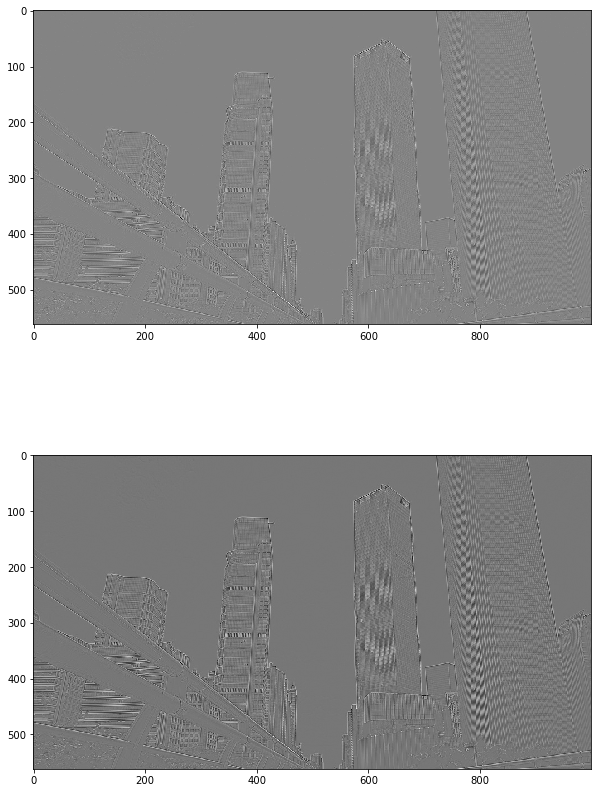

In [5]:
def Laplace(input_image,lap_template):
    x,y = np.shape(lap_template)
    if(x!=y):
        print("Shape of Laplace template wrong!")
        pass
    
    print("The Laplace template is: ")
    print(lap_template)
    border = x//2
    ans = np.zeros(np.shape(input_image), dtype = np.int64)
    
    # 扩充边界
    addBorder = cv2.copyMakeBorder(input_image,border,border,border,border,cv2.BORDER_REFLECT_101)
    
    row,column = np.shape(addBorder)
    for i in range(border,row-border):
        for j in range(border,column-border):
            ans[i-border][j-border] = np.sum(lap_template*addBorder[i-border:i+border+1 , j-border: j+border+1])
    return ans

# Laplace 常用算子 [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
laplace_template_4 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplace_template_8 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])


lap_img_4 = Laplace(im,laplace_template_4)
lap_img_8 = Laplace(im,laplace_template_8)
plt.figure(figsize=(10,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.imshow(lap_img_4 , cmap="gray")
ax2.imshow(lap_img_8 , cmap="gray")
plt.show()

The Laplace template is: 
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
The Laplace template is: 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


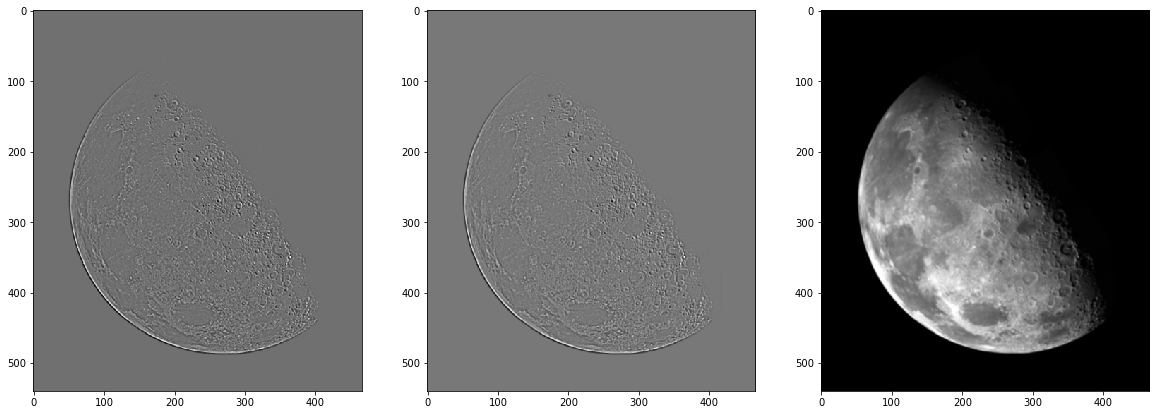

In [7]:
sample_im = cv2.imread('./DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif',cv2.IMREAD_GRAYSCALE)

sample_im  = sample_im.astype (np.int64)

lap_sample_4 = Laplace(sample_im,lap_template=laplace_template_4)
lap_sample_8 = Laplace(sample_im,lap_template=laplace_template_8)
plt.figure(figsize=(20,25))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.imshow(lap_sample_4,cmap="gray")
ax2.imshow(lap_sample_8,cmap="gray" )
ax3.imshow(sample_im, cmap = "gray")
plt.show()

In [3]:
def FuncTo8bit(input_image):
    mmin,mmax = np.max(input_image),np.min(input_image)
    row,column = np.shape(input_image)
    length = mmax-mmin
    ans = np.zeros((row,column), dtype = np.float32)
    for i in range(row):
        for j in range(column):
            ans[i][j] = (input_image[i,j] - mmin)/length*255.0
    ans = ans.astype(np.int64)
    return ans

def Combine(raw_image,sharpen_template,combine_rate):
    res_image = np.zeros(np.shape(raw_image), dtype = np.float32)
    mmin = np.min(sharpen_template)
    mmax = np.max(sharpen_template)
#     res_image = res_image - mmin
    res_image = raw_image+sharpen_template*combine_rate
    res_image.astype(np.int64)
    
    
    row,column = np.shape(sharpen_template)
    for i in range(row):
        for j in range(column):
            if(res_image[i][j] > 255):
                res_image[i][j] = 255
            if(res_image[i][j] < 0):
                res_image[i][j] = 0
    return res_image

# sharpen_sample_4 = Combine(sample_im,after_trans_sample_4)
# sharpen_sample_8 = Combine(sample_im,after_trans_sample_8)



plt.figure(figsize=(20,15))
ax1 = plt.subplot(241)
ax1.set_title("Original Image")
ax1.imshow(sample_im,cmap = "gray")
ax2 = plt.subplot(242)
ax2.set_title("Laplace Sharpen Image (4x4)")
ax2.imshow(lap_sample_4,cmap = "gray")
ax3 = plt.subplot(243)
ax3.set_title("Combine Image with rate=0.5 (4x4)")
ax3.imshow(Combine(sample_im,lap_sample_4,0.5),cmap = "gray")
ax4 = plt.subplot(244)
ax4.set_title("Combine Image with rate=1.0 (4x4)")
ax4.imshow(Combine(sample_im,lap_sample_4,1.0),cmap = "gray")


ax5 = plt.subplot(245)
ax5.imshow(sample_im,cmap = "gray")
ax5.set_title("Original Image")
ax6 = plt.subplot(246)
ax6.set_title("Laplace Sharpen Image (8x8)")
ax6.imshow(lap_sample_8,cmap = "gray")
ax7 = plt.subplot(247)
ax7.imshow(Combine(sample_im,lap_sample_8,0.5),cmap = "gray")
ax7.set_title("Combine Image with rate = 0.5 (4x4)")
ax8 = plt.subplot(248)
ax8.imshow(Combine(sample_im,lap_sample_8,1.0),cmap = "gray")
ax8.set_title("Combine Image with rate = 1.0 (4x4)")

plt.show()


NameError: name 'plt' is not defined

In [4]:
sharpen_img_4 = Combine(im,lap_img_4)
sharpen_img_8 = Combine(im,lap_img_8)

plt.figure(figsize=(30,10))
ax1 = plt.subplot(131)
ax1.imshow(im,cmap="gray")
ax2 = plt.subplot(132)
ax2.imshow(sharpen_img_4,cmap = "gray")
ax3 = plt.subplot(133)
ax3.imshow(sharpen_img_8,cmap = "gray")

NameError: name 'im' is not defined